# **Importing the Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings(action = 'ignore')
plt.style.use(['dark_background'])

# **Load the Dataset**

In [2]:
data = pd.read_csv('loan.csv')
data.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved


# **Analysis of the Data**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              61 non-null     int64 
 1   gender           61 non-null     object
 2   occupation       61 non-null     object
 3   education_level  61 non-null     object
 4   marital_status   61 non-null     object
 5   income           61 non-null     int64 
 6   credit_score     61 non-null     int64 
 7   loan_status      61 non-null     object
dtypes: int64(3), object(5)
memory usage: 3.9+ KB


In [4]:
data.describe()

,age,income,credit_score
count,61.000000,61.000000,61.000000
mean,37.081967,78983.606557,709.836066
std,8.424755,33772.025802,72.674888
min,24.000000,25000.000000,560.000000
25%,30.000000,52000.000000,650.000000
50%,36.000000,78000.000000,720.000000
75%,43.000000,98000.000000,770.000000
max,55.000000,180000.000000,830.000000


In [9]:
for i in data.columns:
    print('{n}: '.format(n = i), data['{n}'.format(n = i)].nunique())

age:  32
gender:  2
occupation:  38
education_level:  5
marital_status:  2
income:  40
credit_score:  28
loan_status:  2


## **Plotting graph of the Variables**

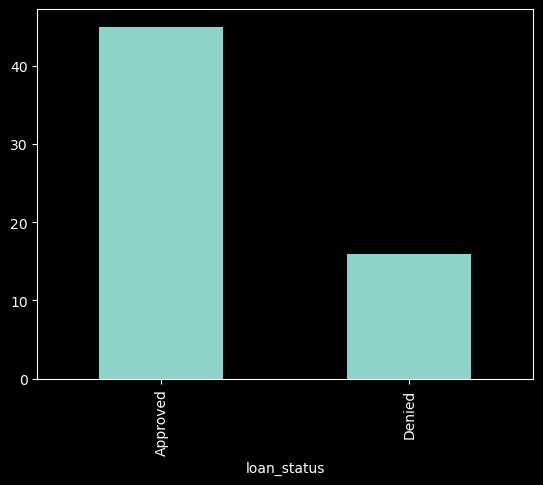

In [6]:
data['loan_status'].value_counts().plot(kind = 'bar')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

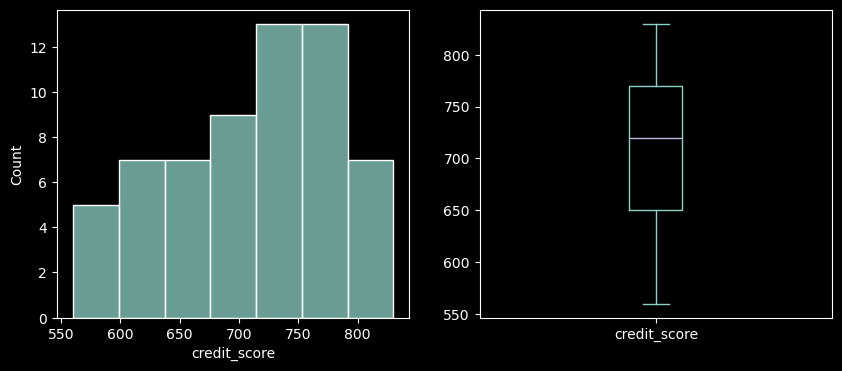

In [16]:
plt.figure(figsize = (10, 4))
plt.subplot(121)
sns.histplot(data['credit_score'])
plt.subplot(122)
data['credit_score'].plot.box()
plt.show

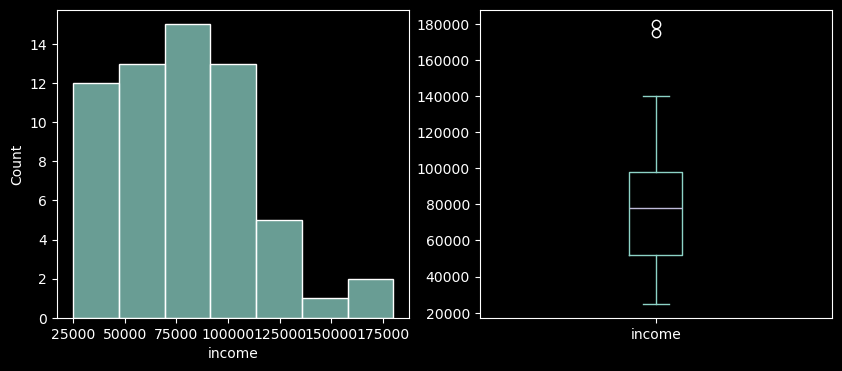

In [15]:
plt.figure(figsize = (10, 4))
plt.subplot(121)
sns.histplot(data['income'])
plt.subplot(122)
data['income'].plot.box()
plt.show()

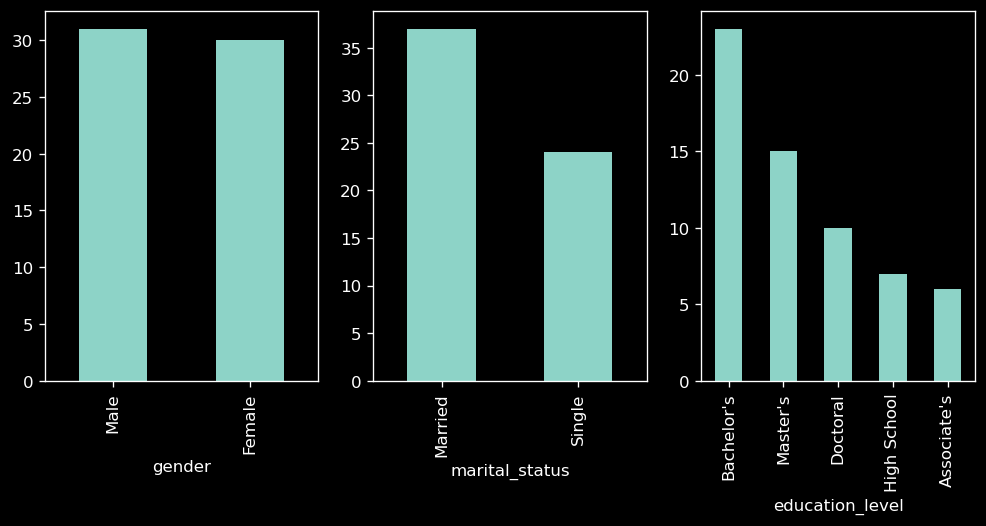

In [27]:
plt.figure(dpi = 120, figsize = (10, 4))
plt.subplot(131)
data['gender'].value_counts().plot(kind = 'bar')
plt.subplot(132)
data['marital_status'].value_counts().plot(kind = 'bar')
plt.subplot(133)
data['education_level'].value_counts().plot(kind = 'bar')
plt.show()

<Axes: xlabel='occupation'>

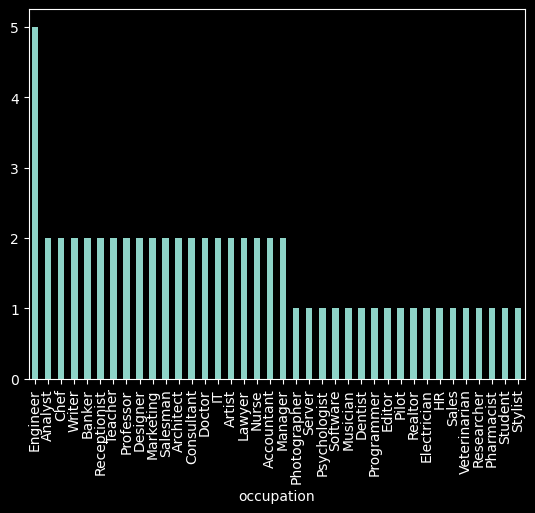

In [28]:
data['occupation'].value_counts().plot(kind = 'bar')

# **Data Spliting and Feature Scaling**

## **Feature Scaling**

In [29]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
encode_cols = ['gender', 'occupation', 'education_level', 'marital_status', 'marital_status', 'loan_status']
for i in encode_cols:
    data[i] = encode.fit_transform(data[i])
data.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,1,12,1,0,85000,720,0
1,45,0,35,4,1,62000,680,0
2,28,1,33,3,1,25000,590,1
3,51,0,16,1,0,105000,780,0
4,36,1,0,1,0,75000,710,0


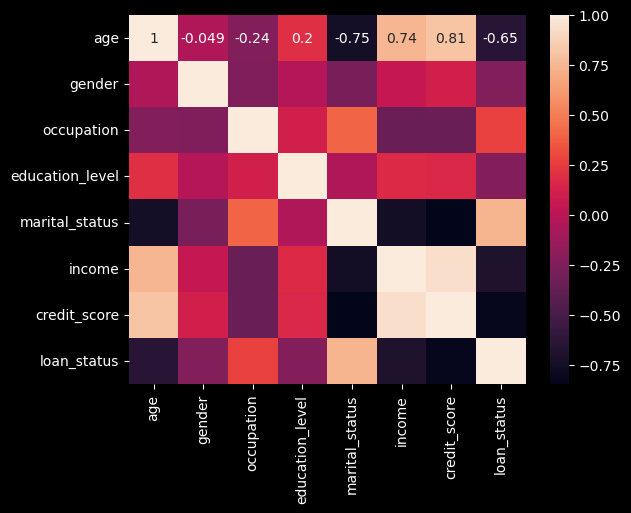

In [30]:
corr = data.corr()
sns.heatmap(data = corr, annot = True)
plt.show()

## **Spliting the data into x and y**

In [31]:
X = data.drop(columns = ['loan_status'])
Y = data['loan_status']

## **Using MinMaxScaler to Scale the data X**

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_X = pd.DataFrame(scaler.fit_transform(X))

## **Creating Train and Test set for the data**

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_X, Y, train_size = 0.8, random_state = 1)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((48, 7), (13, 7), (48,), (13,))

# **Model Building**

## **Random Forest**

In [40]:
from sklearn.ensemble import RandomForestClassifier as RFC
model = RFC()
model.fit(x_train, y_train)

RandomForestClassifier()

### **Predicting from the train set to check**

In [43]:
prediction = model.predict(x_train)
print(classification_report(y_train, prediction))
print('Accuracy Score: ', accuracy_score(y_train, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        10

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48

Accuracy Score:  1.0


### **Predicting from the test set**

In [44]:
prediction = model.predict(x_test)
print(classification_report(y_test, prediction))
print('Accuracy Score: ', accuracy_score(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         6

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13

Accuracy Score:  1.0


# **Model Accuracy and Testing**

In [45]:
actual = list(y_test)
for i in range(len(x_test)):
    print('Actual Value: ', actual[i], ' Predicted Value: ', prediction[i])

Actual Value:  0  Predicted Value:  0
Actual Value:  0  Predicted Value:  0
Actual Value:  1  Predicted Value:  1
Actual Value:  1  Predicted Value:  1
Actual Value:  1  Predicted Value:  1
Actual Value:  0  Predicted Value:  0
Actual Value:  1  Predicted Value:  1
Actual Value:  0  Predicted Value:  0
Actual Value:  0  Predicted Value:  0
Actual Value:  1  Predicted Value:  1
Actual Value:  0  Predicted Value:  0
Actual Value:  1  Predicted Value:  1
Actual Value:  0  Predicted Value:  0
